In [51]:
def predict(W,x,Y,c):
    print(c)
    c= 0
    for i in range(x.shape[0]):
        y_hat = np.sign(np.dot(np.transpose(W),x[i]))
        y_hat += y_hat
        
        if y_hat[i] == 0:
            y_hat[i] = -1
        elif(y_hat[i] is not -1):
            y_hat[i]/2 
 
    return 1- c/x.shape[0]*100

120
0 Predition accuracy for validation data is  1.0
128
1 Predition accuracy for validation data is  1.0
96
2 Predition accuracy for validation data is  1.0
93
3 Predition accuracy for validation data is  1.0
97
4 Predition accuracy for validation data is  1.0
104
5 Predition accuracy for validation data is  1.0
80
6 Predition accuracy for validation data is  1.0
90
7 Predition accuracy for validation data is  1.0
128
8 Predition accuracy for validation data is  1.0
94
9 Predition accuracy for validation data is  1.0
97
10 Predition accuracy for validation data is  1.0
90
11 Predition accuracy for validation data is  1.0
89
12 Predition accuracy for validation data is  1.0
93
13 Predition accuracy for validation data is  1.0
89
14 Predition accuracy for validation data is  1.0


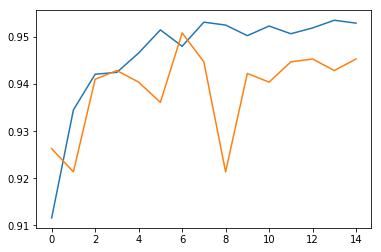

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("pa2_train.csv");
df.columns = [str(i) for i in range(0, df.shape[1])]
df2 = pd.read_csv("pa2_valid.csv");
df2.columns = [str(i) for i in range(0, df.shape[1])]
df["bias"] = 1.0;
df2["bias"] = 1.0;
df.sample(5)
Y=df["0"]
Y = Y.apply(lambda x: 1 if x == 3 else -1)
VY=df2["0"]
VY = VY.apply(lambda x: 1 if x == 3 else -1)
y_hat = []
train_df = df.drop(["0"], axis=1)
valid_df = df2.drop(["0"], axis=1)
(n, features) = train_df.shape

(vn, vfeatures) = valid_df.shape

W = [0 for x in range(0, features)]
W = np.array(W)
iters = 15; _iter = 0;

training_error = []
validation_error = []

while _iter < iters:
    error = 0;
    v_error = 0;
    for i in range(0, n):
        x = train_df.iloc[i]
        u = W.dot(x)
        yi = Y.iloc[i]
        if yi*u <= 0:
            W = np.add(W,np.multiply(yi,x))
            error+=1
    training_error.append((1-(error/n)))
    #print(_iter, "Predition accuracy for training data is ", (1-(error/x.shape[0])))
    for i in range(0, vn):
        vx = valid_df.iloc[i]
        vu = np.array([W]).dot(vx)
        vyi = VY.iloc[i]
        if vyi*vu <= 0:
            v_error += 1;
    validation_error.append((1-(v_error/vn)));
    print(_iter, "Predition accuracy for validation data is ", predict(W,vx,VY,v_error))
    _iter+=1
    

    print(training_error)
    print
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], training_error)
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], validation_error)